<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Autocorrelation


### Learning Objectives
 
**After this lesson, you will be able to:**
- Define autocorrelation and list some real-world examples.
- Use the Pandas `autocorr()` function to compute autocorrelation.
- Calculate and plot the ACF and PACF using StatsModels and Pandas.
- Explain why autocorrelation poses a problem for models that assume independence.
---    

### Lesson Guide

#### Autocorrelation
- [Autocorrelation](#A)
- [Plotting and Interpreting Autocorrelation Functions](#B)
- [Plotting and Interpreting Partial Autocorrelation Functions](#C)
- [Problems Posed by Autocorrelation](#D)
- [Interpreting the ACF and PACF](#E)
- [Independent Practice](#F)
----

<h2><a id = "A">Autocorrelation</a></h2>

While in previous weeks, our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.), in time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values that occur later in time.

Examples of autocorrelation include:

    In stock market data, the stock price at one point is correlated with the stock 
    price of the point that's directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days, to more
    or less of an extent.

> **Check:** What are some examples of autocorrelation that you can think of in the real world?

### How Do We Compute Autocorrelation?

${\Huge R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}^*$

To compute autocorrelation, we fix a **lag**, _k_, which is the delta between the given point and the prior point used to compute the [correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).

With a _k_ value of one, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one that's 10 time points earlier.

$^*$ Note that this formula assumes *stationarity*, which we'll discuss shortly.

### Guided Practice

Last section, we looked at the Rossman Drugstore data to learn how to handle time series data in Pandas. We'll use this same data set to look for autocorrelation. 

We'll import the data and reduce the scope down to one store. Also recall that we need to preprocess the data in Pandas (convert the time data to a `datetime` object and set it as the index of the DataFrame). 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)

# read the rossmann data
data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)

# convert the date column to a datetime object
data['Date'] = pd.to_datetime(data.Date)

# set the datetime as index
data.set_index('Date', inplace=True)

#reduce the scope down to store 1.
store1_data=data[data['Store']==1]

### Computing Autocorrelation

To compute autocorrelation using the Pandas `.autocorr()` function, we enter the parameter for `lag`. Recall that **lag** is the delta between the given point and the prior point used to compute the autocorrelation. 

With a _k_ value of one, we'd compute how correlated a value is with the value that's immediately prior. With a _k_ value of 10, we'd compute how correlated a variable is with the value that's 10 time points prior.

In [4]:
store1_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-05,1,6,4997,635,1,0,0,1
2013-01-04,1,5,4486,619,1,0,0,1
2013-01-03,1,4,4327,578,1,0,0,1


In [5]:
# compute autocorrelation of the Sales column using lag of 1

store1_data.Sales.autocorr(lag=1)

-0.1273251433914022

In [6]:
# compute autocorrelation of the Sales column using lag of 7

store1_data.Sales.autocorr(lag=7)

0.6307192432840288

In [7]:
# compute autocorrelation of the Sales column using lag of 14

store1_data.Sales.autocorr(lag=14)

0.7248992679736443

Just like with correlation between different variables, the data become more correlated as this number moves closer to one.

<h2><a id = "B">Plotting Autocorrelation Functions Using StatsModels and Pandas</a></h2>

Pandas provides convenience plots for autocorrelations.

In [8]:
from pandas.plotting import autocorrelation_plot, lag_plot



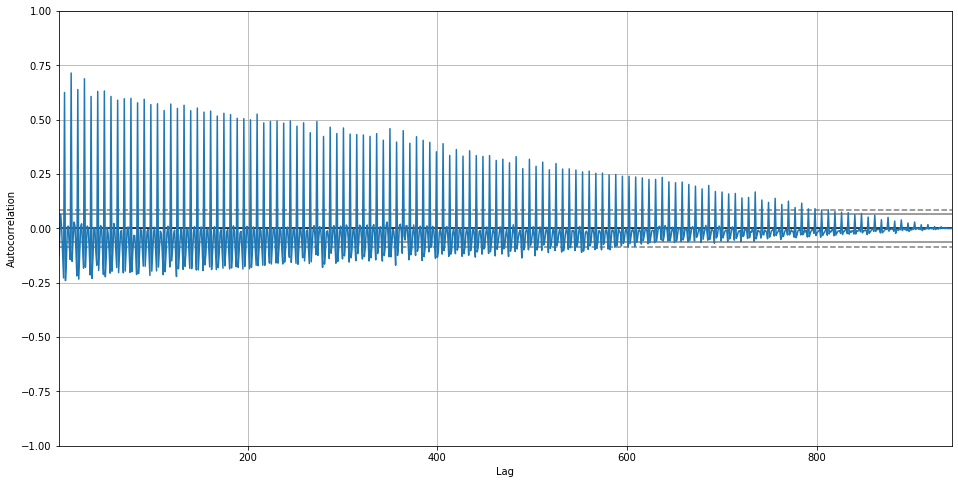

In [9]:
autocorrelation_plot(store1_data.Sales)

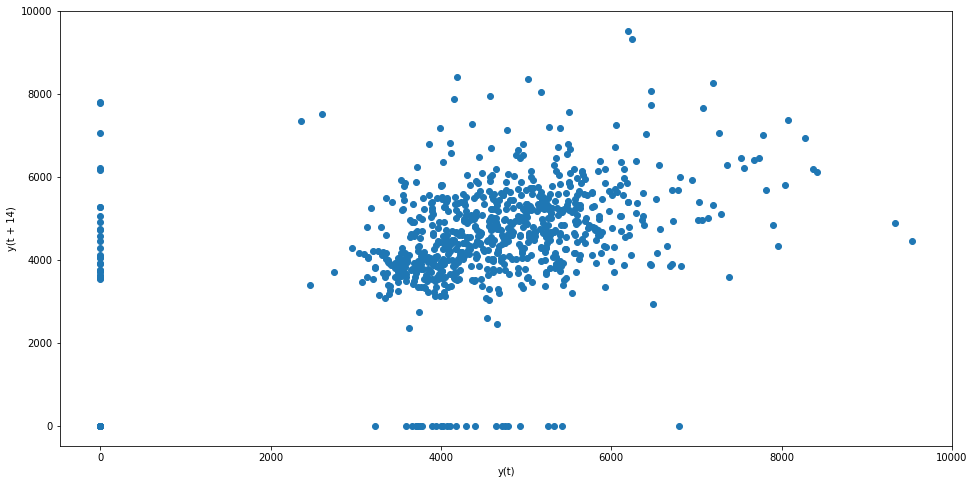

In [10]:
lag_plot(store1_data.Sales,lag=14)

StatsModels also comes with some convenient packages for calculating and plotting autocorrelation. Load up these two functions and try them out.

In [11]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

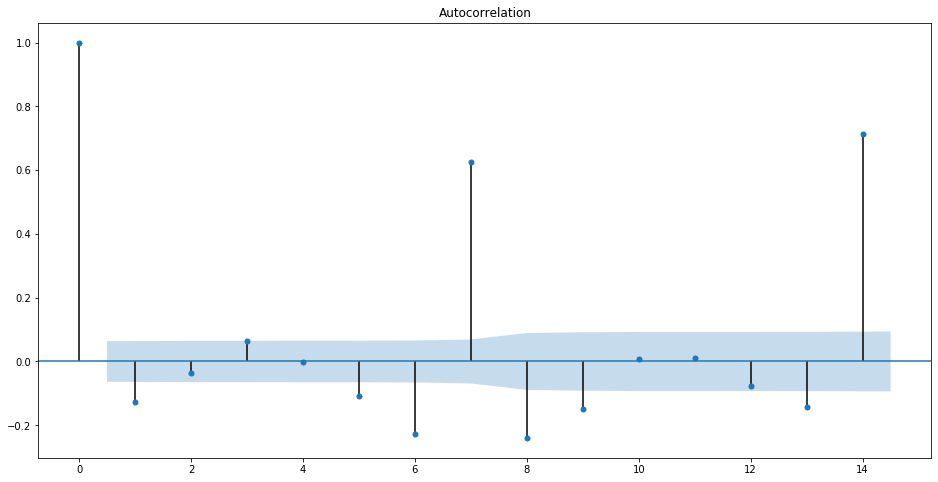

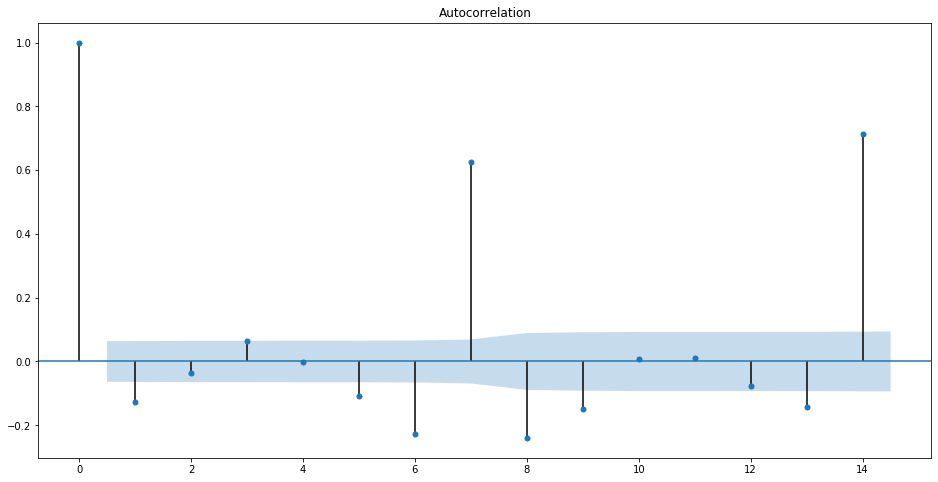

In [13]:
plot_acf(store1_data.Sales, lags=14)

This plots the correlation between the series and a lagged series for the lags indicated on the horizontal axis. For instance, at `0`, the series will be completely correlated with itself, so the blue dot is at `1.0`. The points that fall outside of the blue indicate significant correlation values. Big jumps in autocorrelation appear at lags that are multiples of seven. Our sales data are daily, so it makes a lot of sense that a single Monday's sales would be correlated with the prior Monday's (and the one before it... and so on).

Our data set here isn't *stationary* (the mean, the variance, and/or the covariance vary over time), so it isn't appropriate to try to diagnose what forecasting model we should use. However, we can see the seasonality of the data set clearly in the ACF.

In [19]:
acf(store1_data.Sales.values)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.12703786, -0.03469319,  0.06454937, -0.00180766,
       -0.10904274, -0.22783504,  0.6248786 , -0.2401515 , -0.14869745,
        0.00624578,  0.01006485, -0.07707318, -0.14363042,  0.71435429,
       -0.15188393, -0.05551585,  0.02901103,  0.01113764, -0.09400308,
       -0.21875595,  0.63865175, -0.23360339, -0.11384778,  0.00788378,
        0.02095157, -0.07841381, -0.18374454,  0.68804836, -0.17930762,
       -0.07734379,  0.01060628, -0.00112696, -0.09014802, -0.21435881,
        0.60668328, -0.230107  , -0.12860469,  0.00378231,  0.00237381,
       -0.10721685])

<h2><a id= "C">Partial Autocorrelation and the Partial Autocorrelation Function (PACF)</a></h2>

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

Load up the sister functions for partial autocorrelation from StatsModels and test them out on the differenced time series.

In [14]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

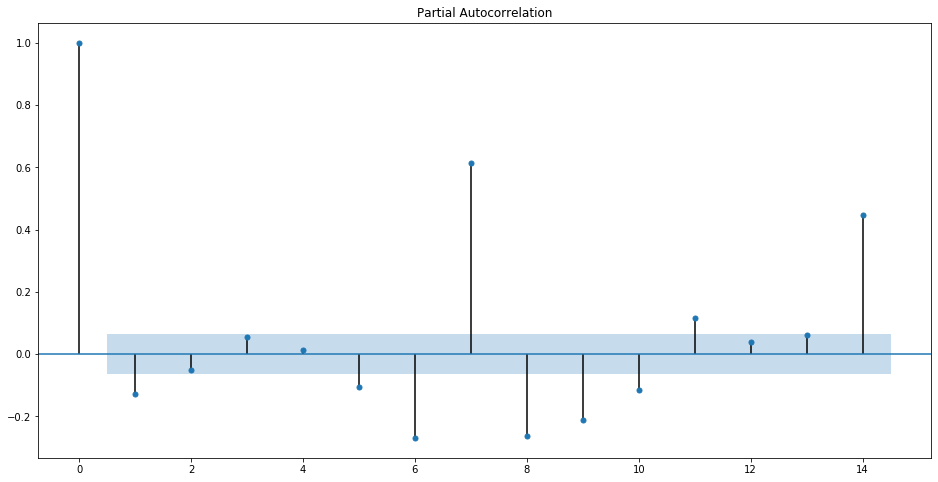

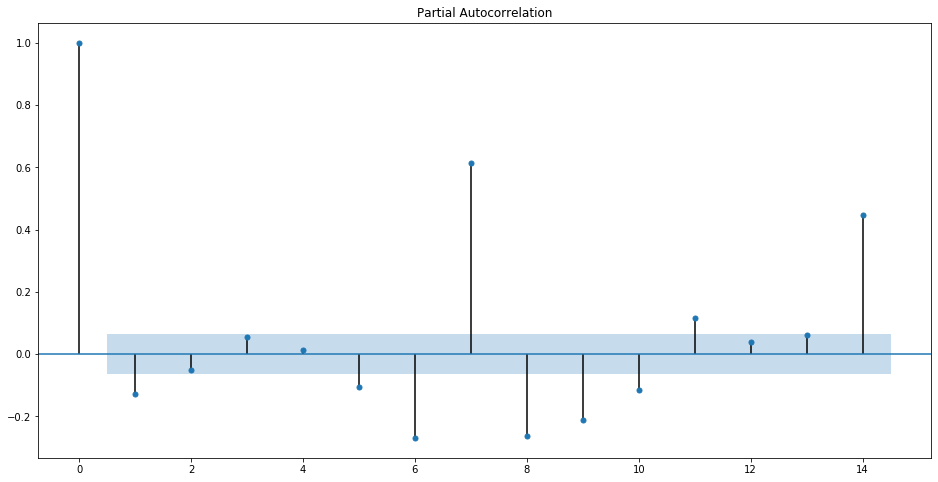

In [15]:
plot_pacf(store1_data.Sales, lags=14)

This plots the correlation at a given lag (indicated by the horizontal axis), controlling for all of the previous lags. We continue to see big jumps in correlation at the weekly time lags, an indicator that seasonality is still present in our time series. 

In [18]:
pacf(store1_data.Sales.values)

array([ 1.00000000e+00, -1.27172867e-01, -5.17773322e-02,  5.45466222e-02,
        1.23214062e-02, -1.05814185e-01, -2.69339271e-01,  6.13891806e-01,
       -2.64313948e-01, -2.12840451e-01, -1.14091049e-01,  1.16903523e-01,
        3.98957387e-02,  6.13519367e-02,  4.48132326e-01, -2.58046698e-02,
       -7.87918641e-04, -1.32845421e-01,  3.26825588e-02,  2.08959582e-03,
       -6.67821339e-02,  2.51756307e-01, -8.03613671e-02,  3.00956887e-03,
       -5.04939348e-02,  1.07025969e-01, -3.22519598e-02, -4.38687145e-02,
        2.31052301e-01, -4.12160559e-02, -1.29869374e-02, -1.28248009e-01,
        1.92976513e-02,  2.41335134e-02, -1.38720582e-02,  4.87918471e-02,
       -6.34587157e-02, -3.56958681e-02, -2.05192404e-02,  1.72396841e-02,
       -1.12545098e-01])

> **Check:** How might seasonality in a data set (monthly, weekly, etc.) show up in autocorrelation plots?

<h2><a id = "D">Problems Posed by Autocorrelation</a></h2>

Models like linear regression analysis require that there is little or no autocorrelation in the data. That is, linear regressions requires that the residuals/error terms are independent of one another. So far, we have assumed all of the independent values in our models have been independent, but this is unlikely with time series data, because the temporal component of time series models means that they will often contain autocorrelation. 

> **What are some problems that could arise when using autocorrelated data with a linear model?**
* Estimated regression coefficients are still unbiased, but they no longer have the minimum variance property.
* The MSE may seriously underestimate the true variance of the errors.
* The standard error of the regression coefficients may seriously underestimate the true standard deviation of the estimated regression coefficients.
* Statistical intervals and inference procedures are no longer strictly applicable.



> **Check:** Why can't we apply linear regression to most time series data sets?

<h2><a id = "E">Interpreting the ACF and the PACF for Use in Forecasting Models</a></h2>

As we learned above, the autocorrelation function (ACF) is a plot of total correlation between different lags. If we decide to use the moving average (MA) method for forecasting, the ACF plot will help us identify the order of the MA model. We can find the lag (the *q* value) for an MA series by determining when the ACF drops off sharply. For an autoregressive (AR) time series, the ACF will go down gradually without any sharp cut-off. 

If the ACF tells us it is an AR series, then we turn to the PACF. If we find out the partial correlation of each lag, it will cut off after the degree of the AR series (the *p* value). For instance, if we have a AR(1) series, the partial correlation function (PACF) will drop sharply after the first lag.

*We'll learn more about AR and MA models in this lesson's bonus section.*

# Recap

* Autocorrelation is a measure of how dependent a data point is on previous data points.
* Investigating ACF and PACF plots can help us identify an appropriate forecasting model and look for seasonality in our time series data.
* Simple linear regression cannot apply to data with autocorrelations because these data no longer have independent errors.

<h2><a id = "F">Independent Practice</a><h2>

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

## 1) Import the European Retail data set, preprocess the data, and create an initial plot (Hint: Use `.stack.plot()`).

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
euro = pd.read_csv('./data/euretail.csv')

## 2) Use `plot_acf` and `plot_pacf` to look at the autocorrelation in the data set.

In [ ]:
euro = euro.stack()

## 3) Interpret your findings.